# Olympics from Athens 1896 to Rio 2016

Let's load some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))

## Load data

In [2]:
# Let's load the data

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-08-06/olympics.csv',
                 index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.shape

(271116, 14)

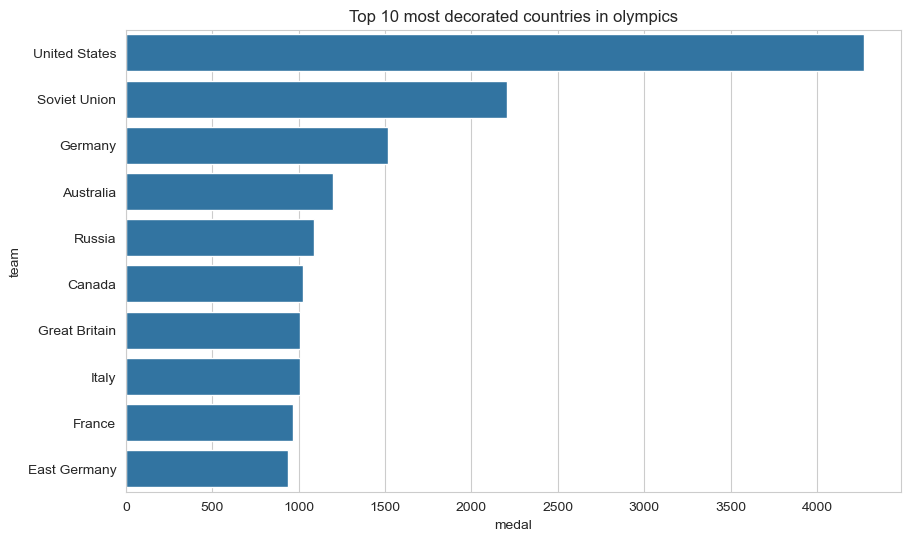

In [4]:
# Which are the countries with more olympic medals?

cty = (df
    .dropna()
    .pivot_table(values='medal', index='team',
                 aggfunc='count')
    .sort_values(by='medal', ascending=False)
    .head(10)
      )

sns.set_style('whitegrid')
sns.barplot(data=cty, y='team', x='medal')
plt.title('Top 10 most decorated countries in olympics');

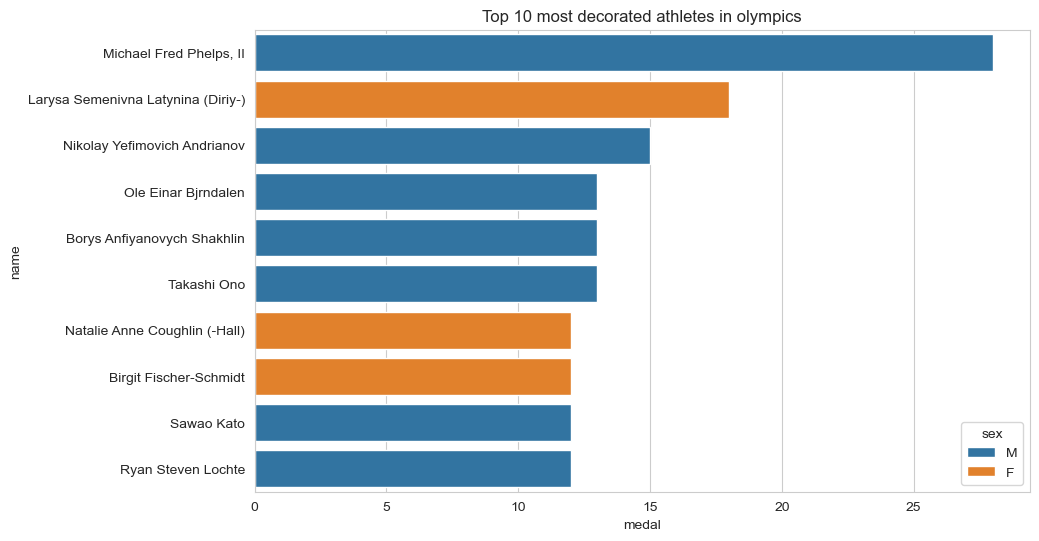

In [5]:
# Who is the most decorated olympic athlete of all time?

per = (df
    .dropna()
    .pivot_table(values='medal',
                 index=['sex', 'name'],
                 aggfunc='count')
    .sort_values(by='medal', ascending=False)
    .head(10))

sns.barplot(data=per, y='name', x='medal',
            hue='sex')
plt.title('Top 10 most decorated athletes in olympics');

In [6]:
# Which countries brings the most athletes to olympics?

(df
    .groupby(by='team')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
dtype: int64

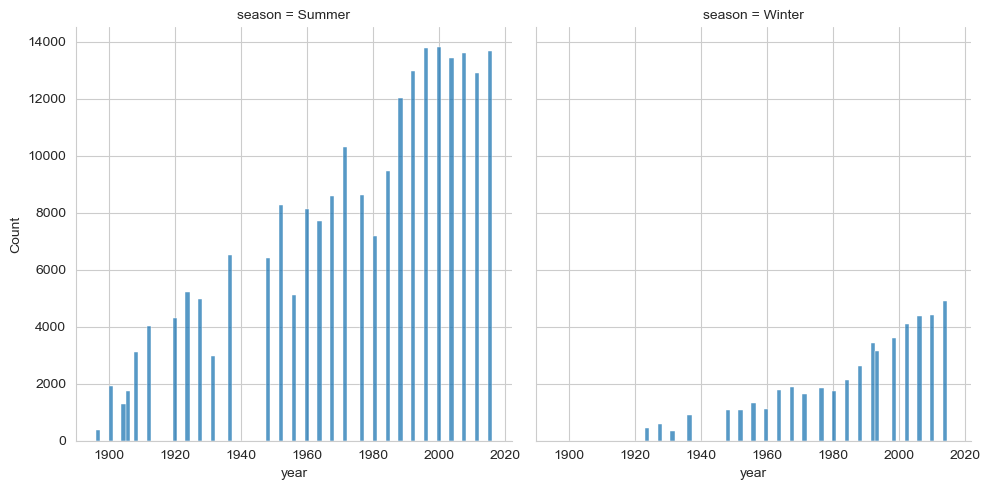

In [7]:
# How is the distribution of athletes accross the years?

sns.displot(data=df, x='year', col='season', kind='hist');

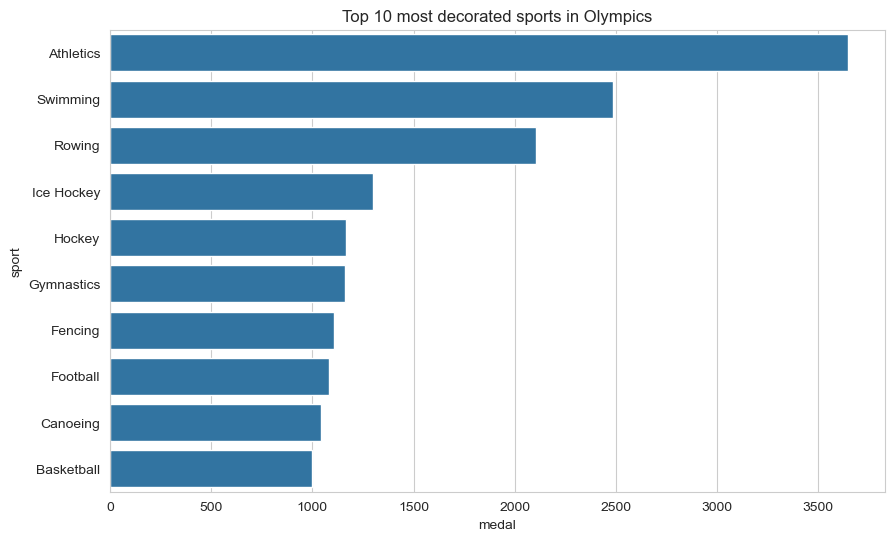

In [8]:
# Which are the most laureated sports in the olympics?

sports = (df
    .dropna()
    .pivot_table(values='medal', index='sport',
                 aggfunc='count')
    .sort_values(by='medal', ascending=False)
    .head(10)
)

sns.barplot(data=sports, x='medal', y='sport')
plt.title('Top 10 most decorated sports in Olympics');

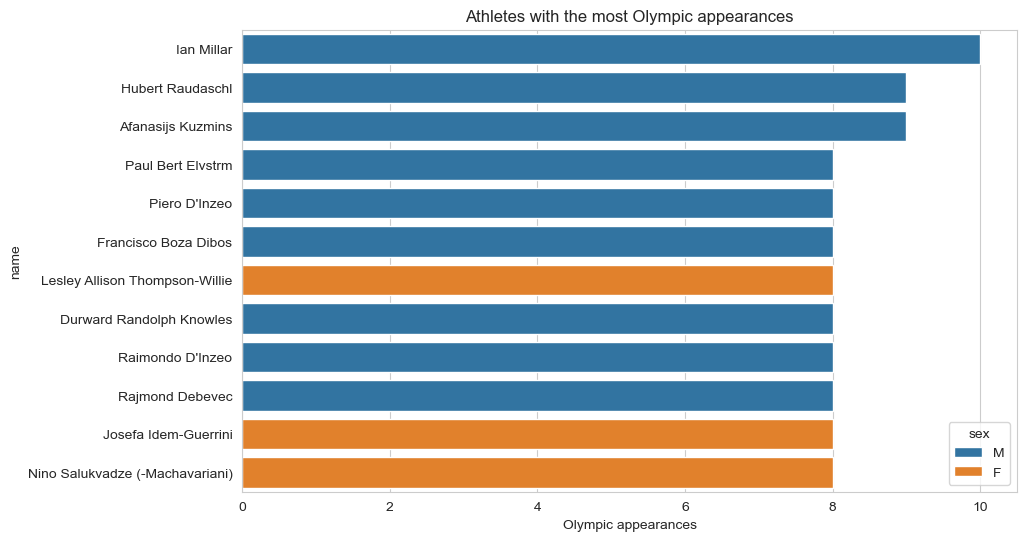

In [9]:
# Who are the athletes with the most appearances at Olympic Games?

app = (df
    .groupby(['name', 'sex'])[['year']]
    .nunique()
    .sort_values(by='year', ascending=False)
    .head(12)
      )

sns.barplot(data=app, y='name', x='year', hue='sex')
plt.title('Athletes with the most Olympic appearances')
plt.xlabel('Olympic appearances');

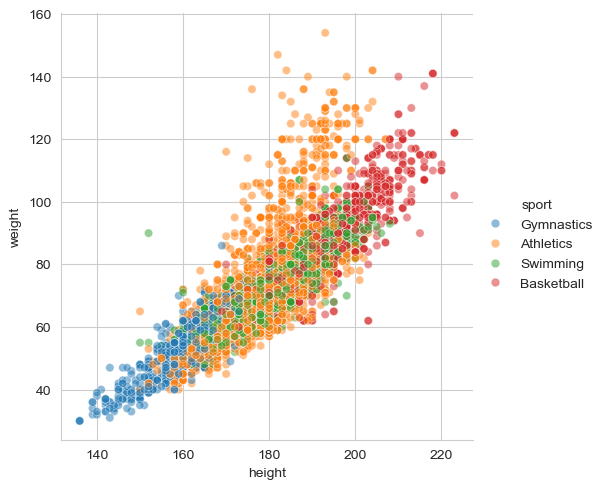

In [10]:
# What is the relationship between height and weight of the athletes?

sns.relplot(data=
            (df[df['sport']
                .isin(['Athletics', 'Swimming', 'Gymnastics', 'Basketball'])]
                .dropna()
                .drop_duplicates(subset=['name', 'year'])),
            x='height', y='weight', hue='sport',
            kind='scatter', alpha=0.5);

In [11]:
# Which are the countries with the most golden medals in Summer olympics?

(df
    .dropna()
    .groupby(['team', 'season', 'medal'])['medal']
    .count()
    .unstack(level=1)
    .unstack(level=1)
    .sort_values(by=('Summer', 'Gold'), ascending=False)
    .head(10)
)

season        Summer                 Winter              
medal         Bronze    Gold  Silver Bronze   Gold Silver
team                                                     
United States  834.0  1949.0  1032.0  104.0  126.0  228.0
Soviet Union   552.0   756.0   556.0   61.0  205.0   73.0
Germany        484.0   400.0   362.0   56.0  108.0  108.0
East Germany   227.0   337.0   277.0   34.0   31.0   29.0
Australia      465.0   308.0   409.0    6.0    5.0    3.0
Great Britain  333.0   306.0   338.0   13.0   15.0    5.0
China          236.0   294.0   298.0   30.0   14.0   25.0
Russia         321.0   292.0   270.0   71.0   64.0   73.0
Hungary        270.0   289.0   226.0    2.0    NaN    2.0
Italy          311.0   261.0   299.0   55.0   41.0   41.0